In [1]:
import pmdarima as pm
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("new cases dataset.csv", index_col='date', parse_dates=True)
print('shape',dataset.shape)
dataset.describe()

shape (500, 11)


,total_cases,new_cases,total_deaths,new_deaths,reproduction_rate,positive_rate,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,stringency_index
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,5.000000e+02,500.000000,500.000000,500.00000,500.000000
mean,52728.956000,204.206000,383.742000,1.646000,1.122480,0.068814,2.869641e+04,24776.272000,3920.140000,241.36000,47.446220
std,32793.093696,296.233164,281.213438,3.354876,0.263627,0.061634,1.613339e+05,133943.541915,39060.971015,3144.28997,12.460919
min,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.00000,0.000000
25%,26460.250000,0.000000,142.750000,0.000000,0.997500,0.023000,0.000000e+00,0.000000,0.000000,0.00000,38.890000
50%,50544.000000,89.000000,323.000000,0.000000,1.170000,0.045000,0.000000e+00,0.000000,0.000000,0.00000,44.440000
75%,89893.000000,281.250000,734.000000,2.000000,1.252500,0.100000,0.000000e+00,0.000000,0.000000,0.00000,52.780000
max,102103.000000,1583.000000,823.000000,28.000000,1.550000,0.319000,1.271393e+06,865422.000000,405971.000000,48252.00000,86.110000


In [3]:
dataset.new_cases = dataset.new_cases.astype(int)

In [4]:
from statsmodels.tsa.stattools import adfuller
def ad_test(dataset):
    dftest= adfuller(dataset,autolag='AIC')
    print("1, ADF :",dftest[0])
    print("2, P-Value :", dftest[1])
    print("3, Num of lags:", dftest[2])
    print("4, Num of observations used for ADF Regression and Critical Values Circulation:", dftest[3])
    print("5, Critical Values:")
    for key, val in dftest[4].items():
        print("\t",key,":", val)

In [5]:
ad_test(dataset['new_cases'])

1, ADF : -2.133245244648487
2, P-Value : 0.23135829435900973
3, Num of lags: 8
4, Num of observations used for ADF Regression and Critical Values Circulation: 491
5, Critical Values:
	 1% : -3.4437386290417082
	 5% : -2.867444458865948
	 10% : -2.5699148492415413


In [6]:
from pmdarima import auto_arima
import warnings 
warnings.filterwarnings("ignore")

In [7]:
stepwise_fit= auto_arima(dataset['new_cases'],trace=True, seasonal=True, suppress_warnings= True)

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=6871.990, Time=0.60 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=7113.084, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=7067.011, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=7086.900, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=7305.801, Time=0.00 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=6873.627, Time=0.42 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=6883.613, Time=0.36 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=6886.742, Time=0.55 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.49 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=6910.551, Time=0.42 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=6872.229, Time=0.43 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=6877.929, Time=0.46 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.67 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=6873.933, Time=0.32 sec

Best model:  ARIMA(2,0,2)(0,0,0)[0] interc

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  500
Model:               SARIMAX(2, 0, 2)   Log Likelihood               -3429.995
Date:                Tue, 21 Sep 2021   AIC                           6871.990
Time:                        09:15:48   BIC                           6897.278
Sample:                             0   HQIC                          6881.913
                                - 500                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      3.9563      3.736      1.059      0.290      -3.367      11.279
ar.L1          1.2381      0.081     15.350      0.000       1.080       1.396
ar.L2         -0.2562      0.082     -3.136      0.002      -0.416      -0.096
ma.L1         -1.3561      0.074    -18.387      0.000      -1.501      -1.212
ma.L2          0.5082      0.065      7.805      0.000       0.381       0.636
sigma2      5.311e+04   2085.032     25.472      0.000     4.9e+04    5.72e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               598.89
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.83   Skew:                             1.24
Prob(H) (two-sided):                  0.22   Kurtosis:                         7.76
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [8]:
from statsmodels.tsa.arima_model import ARIMA

In [9]:
train= dataset.iloc[:-50]
test= dataset.iloc[-50:]
print(train.shape,test.shape)

(450, 11) (50, 11)


In [10]:
model = ARIMA(train['new_cases'], order=(2,0,2))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:              new_cases   No. Observations:                  450
Model:                     ARMA(2, 2)   Log Likelihood               -3092.268
Method:                       css-mle   S.D. of innovations            233.013
Date:                Tue, 21 Sep 2021   AIC                           6196.535
Time:                        09:15:49   BIC                           6221.191
Sample:                    03-14-2020   HQIC                          6206.253
                         - 06-06-2021                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             182.4994     84.811      2.152      0.031      16.273     348.726
ar.L1.new_cases     1.2273      0.134      9.186      0.000       0.965       1.489
ar.L2.new_cases    -0.2451      0.132     -1.862      0.063      -0.503       0.013
ma.L1.new_cases    -1.3602      0.117    -11.654      0.000      -1.589      -1.131
ma.L2.new_cases     0.5075      0.099      5.123      0.000       0.313       0.702
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0243           +0.0000j            1.0243            0.0000
AR.2            3.9827           +0.0000j            3.9827            0.0000
MA.1            1.3401           -0.4179j            1.4037           -0.0481
MA.2            1.3401           +0.4179j            1.4037            0.0481
-----------------------------------------------------------------------------
"""

In [11]:
start=len(train)
end=len(train)+len(test)-1
pred2=model.predict(start=start,end=end,typ='levels')
pred2= pred2.round()
print(pred2)

2021-06-07     74.0
2021-06-08     68.0
2021-06-09     68.0
2021-06-10     71.0
2021-06-11     73.0
2021-06-12     76.0
2021-06-13     78.0
2021-06-14     81.0
2021-06-15     83.0
2021-06-16     85.0
2021-06-17     88.0
2021-06-18     90.0
2021-06-19     92.0
2021-06-20     94.0
2021-06-21     96.0
2021-06-22     98.0
2021-06-23    100.0
2021-06-24    102.0
2021-06-25    104.0
2021-06-26    106.0
2021-06-27    108.0
2021-06-28    110.0
2021-06-29    111.0
2021-06-30    113.0
2021-07-01    115.0
2021-07-02    116.0
2021-07-03    118.0
2021-07-04    120.0
2021-07-05    121.0
2021-07-06    122.0
2021-07-07    124.0
2021-07-08    125.0
2021-07-09    127.0
2021-07-10    128.0
2021-07-11    129.0
2021-07-12    131.0
2021-07-13    132.0
2021-07-14    133.0
2021-07-15    134.0
2021-07-16    135.0
2021-07-17    136.0
2021-07-18    138.0
2021-07-19    139.0
2021-07-20    140.0
2021-07-21    141.0
2021-07-22    142.0
2021-07-23    143.0
2021-07-24    144.0
2021-07-25    144.0
2021-07-26    145.0


In [12]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred2,test['new_cases']))
print(rmse)

219.9424470173959


In [13]:
model2= ARIMA(dataset['new_cases'],order=(2,0,2))
model2=model2.fit()
dataset.tail()

,total_cases,new_cases,total_deaths,new_deaths,reproduction_rate,positive_rate,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,stringency_index
date,,,,,,,,,,,
2021-07-22,99160.0,0,815.0,0.0,1.45,0.0,0.0,0.0,0.0,0.0,0.0
2021-07-23,100250.0,1090,819.0,4.0,1.46,0.0,0.0,0.0,0.0,0.0,0.0
2021-07-24,100747.0,497,819.0,0.0,1.46,0.0,0.0,0.0,0.0,0.0,0.0
2021-07-25,101170.0,423,821.0,2.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0
2021-07-26,102103.0,933,823.0,2.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
index_future_dates=pd.date_range(start='2021-07-26',end='2021-08-25')
pred=model2.predict(start=len(dataset),end=len(dataset)+30,typ='levels').rename('ARIMA Predictions')
pred.index=index_future_dates
pred=pred.round()
print(pred)

2021-07-26    316.0
2021-07-27    476.0
2021-07-28    512.0
2021-07-29    516.0
2021-07-30    511.0
2021-07-31    505.0
2021-08-01    498.0
2021-08-02    491.0
2021-08-03    484.0
2021-08-04    478.0
2021-08-05    471.0
2021-08-06    465.0
2021-08-07    459.0
2021-08-08    453.0
2021-08-09    447.0
2021-08-10    442.0
2021-08-11    436.0
2021-08-12    431.0
2021-08-13    425.0
2021-08-14    420.0
2021-08-15    415.0
2021-08-16    410.0
2021-08-17    405.0
2021-08-18    401.0
2021-08-19    396.0
2021-08-20    392.0
2021-08-21    387.0
2021-08-22    383.0
2021-08-23    379.0
2021-08-24    375.0
2021-08-25    371.0
Freq: D, Name: ARIMA Predictions, dtype: float64


<AxesSubplot:>

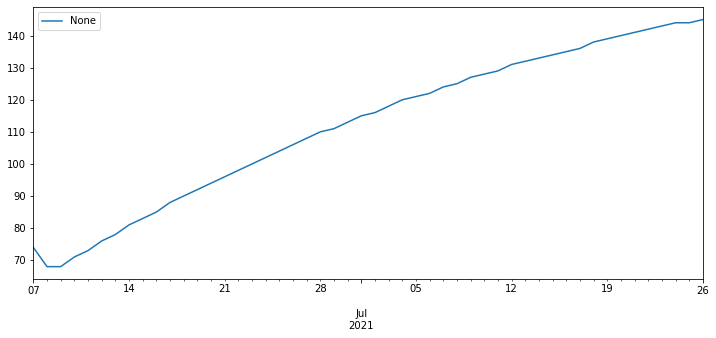

In [17]:
pred2.plot(figsize=(12,5),legend=True)

In [18]:
from sklearn.metrics import mean_absolute_error
mae_new_cases=mean_absolute_error(pred2,test['new_cases'])
print('Mean absolute error of new cases is:',mae_new_cases)

Mean absolute error of new cases is: 141.8


In [19]:
import math 
from statistics import mean
mean_new_cases = mean(test['new_cases'])
print(mean_new_cases)

157.5


In [20]:
index_future_dates2=pd.date_range(start='2021-07-26',end='2027-01-16')
pred3=model2.predict(start=len(dataset),end=len(dataset)+2000,typ='levels').rename('ARIMA Predictions2')
pred3.index=index_future_dates2
pred3=pred3.round()
print(pred3)

2021-07-26    316.0
2021-07-27    476.0
2021-07-28    512.0
2021-07-29    516.0
2021-07-30    511.0
              ...  
2027-01-12    215.0
2027-01-13    215.0
2027-01-14    215.0
2027-01-15    215.0
2027-01-16    215.0
Freq: D, Name: ARIMA Predictions2, Length: 2001, dtype: float64


In [21]:
tilljan27 = pd.DataFrame(pred3)
tilljan27

,ARIMA Predictions2
2021-07-26,316.0
2021-07-27,476.0
2021-07-28,512.0
2021-07-29,516.0
2021-07-30,511.0
...,...
2027-01-12,215.0
2027-01-13,215.0
2027-01-14,215.0
2027-01-15,215.0


In [22]:


def forecastforthatday(a,b):
    return tilljan27.loc[a:b]

In [23]:
mm= forecastforthatday('2024-08-08','2024-08-08')
mm

,ARIMA Predictions2
2024-08-08,215.0


In [ ]:
DD= input("ENTER A DAY (YYYY-MM-DD:)")

In [ ]:
MM= DD
print("The number of new cases on", DD ,"were:",forecastforthatday(DD,MM) )